In [2]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
import statistics
from statistics import mean
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D
from yellowbrick.model_selection import FeatureImportances


%matplotlib inline

## Predicting Diabetes In Female Patients
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.  


The objective is to use Binary Classification to predict if patient has diabetes or not 

Pima People Diabetes Database

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

"This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima people heritage."

## I have a hunch that BMI and Glucose will be the two best features at predicting if a patient is diabetic or not

## Load and view dataset

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# load csv
diabetesCSV = pd.read_csv('resources/diabetes.csv')
diabetesCSV

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetesCSV.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# display basic info about diabetesCSV
diabetesCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Basic statistics
diabetesCSV.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# view diabetesCSV shape 
diabetesCSV.shape

(768, 9)

## Visualize available variables relationship

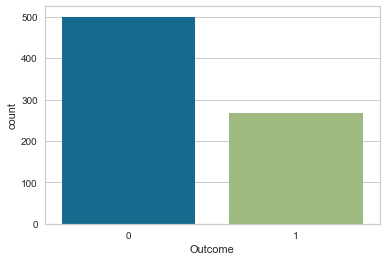

In [9]:
# use seaborn countplot to visualize diabetic test results
sns.countplot(x="Outcome",data = diabetesCSV)
plt.savefig('assets/screenshots/only_bmi_and_glucose/who-is-diabetic-countplot.png')

<AxesSubplot:title={'center':'Feature Importances of 8 Features using RandomForestClassifier'}, xlabel='relative importance'>

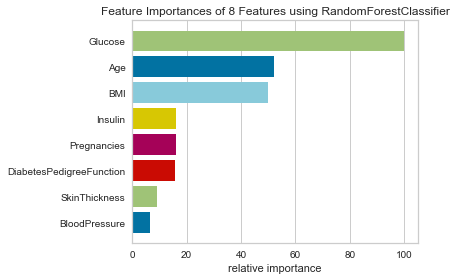

In [12]:
# show visualiation that ranks feature importance

X = diabetesCSV.copy()
X.drop(columns='Outcome',inplace=True)
y = diabetesCSV.Outcome

# Creating the feature importances plot
visualizer = FeatureImportances(RandomForestClassifier(max_depth=3),
                                relative=True)

visualizer.fit(X, y)

# Saving plot in PNG format
visualizer.show(outpath='assets/images/feature-importance.png')

<AxesSubplot:title={'center':'Shapiro Ranking of 8 Features'}>

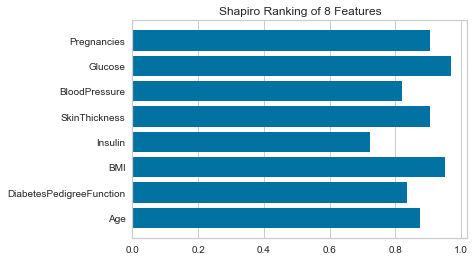

In [16]:
# rank features with Rank1D from yellowbrick 

# create variables to use 
y = diabetesCSV['Outcome']
X = diabetesCSV.copy()
X.drop(columns='Outcome', inplace=True)


# Instantiate the 1D visualizer with the Shapiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data

# Finalize and render the figure
visualizer.show(outpath='assets/screenshots/only_bmi_and_glucose/feature-ranking.png')  


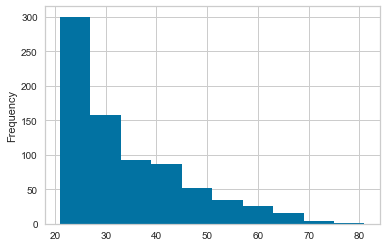

In [17]:
# Visualize age group frequency
diabetesCSV["Age"].plot.hist()
plt.savefig('assets/screenshots/only_bmi_and_glucose/age-frequency.png')

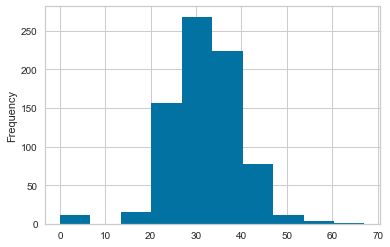

In [18]:
# Visualize BMI group frequency
diabetesCSV["BMI"].plot.hist()
plt.savefig('assets/screenshots/only_bmi_and_glucose/BMI-frequency.png')

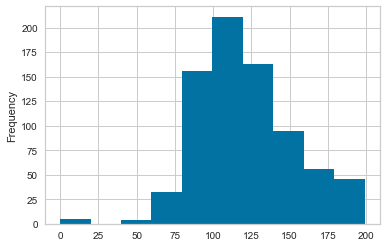

In [19]:
# Visualize Glucose group frequency
diabetesCSV["Glucose"].plot.hist()
plt.savefig('assets/screenshots/only_bmi_and_glucose/Glucose-frequency.png')

# Chosen features are Glucose, BMI

### Choosing features

In [20]:
# create empty list
feature = []
target = []

# for loop to create feature lists to add to above created list

for i in range(len(diabetesCSV)):
    diabetesX = []
    diabetesY = ''
    
    diabetesY = diabetesCSV.iloc[i,8]
    diabetesX.append(diabetesCSV.iloc[i,1])
    diabetesX.append(diabetesCSV.iloc[i,5])
    
    feature.append(diabetesX)
    target.append(diabetesY)
    
print(feature[:5])
print(target[:5])

[[148, 33.6], [85, 26.6], [183, 23.3], [89, 28.1], [137, 43.1]]
[1, 0, 1, 0, 1]


In [21]:
# Turn python lists into numpy arrays
features = np.array(feature)
targets = np.array(target)
features[:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

### Use Z-Score normalization on features to visualize

In [22]:
# finding standard deviation and mean of each column
featureSTDEV = features.std()
featureAVG = np.average(features)
featureSTDEV

50.17357343740608

In [23]:
# implement Z-Score normalization
featuresNORM = (features - featureAVG)/featureSTDEV

### Create a dataframe with normalized features 

In [24]:
df = pd.DataFrame(data = featuresNORM)
df['Diabetic?'] = targets
df

,0,1,Diabetic?
0,1.426178,-0.853907,1
1,0.170537,-0.993422,0
2,2.123756,-1.059194,1
3,0.250260,-0.963526,0
4,1.206939,-0.664564,1
...,...,...,...
763,0.489430,-0.867858,0
764,0.907977,-0.790128,0
765,0.888046,-1.001395,0
766,0.987700,-0.923665,1


In [25]:
diabetics = df[df['Diabetic?'] == 1][[0,1]]
nonDiabetics = df[df['Diabetic?'] == 0][[0,1]]
diabetics[:5]

,0,1
0,1.426178,-0.853907
2,2.123756,-1.059194
4,1.206939,-0.664564
6,0.031021,-0.905727
8,2.402788,-0.915692


## Create visualization of chosen features

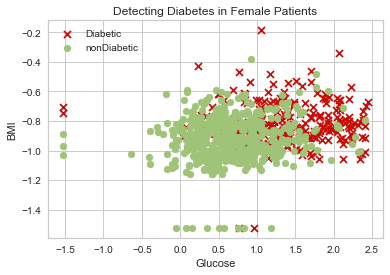

In [26]:
figure1, figure1_axes = plt.subplots()

figure1_axes.scatter(diabetics[[0]], diabetics[[1]], color = 'r', marker='x', label='Diabetic')
figure1_axes.scatter(nonDiabetics[[0]], nonDiabetics[[1]], color = 'g', marker='o', label='nonDiabetic')

figure1_axes.set_xlabel('Glucose')
figure1_axes.set_ylabel('BMI')
figure1_axes.legend(['Diabetic', 'nonDiabetic'])
figure1_axes.set_title('Detecting Diabetes in Female Patients');
figure1.savefig("assets/screenshots/only_bmi_and_glucose/visualizations/glucoseVSbmi.png")

# Create Logistic Model

In [27]:
# Split the data into X_train, X_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(features, targets)

### Define Sigmoid function

In [28]:
def sigmoid(z):
    
    g = 1/(1+np.exp(-z))
    
    return g

### Define Cost Function

In [29]:
def compute_cost(X, y, w, b, lambda_= 1):

    m, n = X.shape
    cost = 0.
    
    for i in range (m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    
    total_cost = cost/m    

    return total_cost

In [30]:
m, n = x_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [31]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(x_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))

Cost at test w,b: 3.114


## Compute Gradient

In [32]:
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        # Calculate f_wb (exactly as you did in the compute_cost function above)
        z_i = np.dot(X[i],w) + b

        # Calculate the prediction from the model
        f_wb = sigmoid(z_i)
            
        # Calculate the  gradient for b from this example
        dj_db_i = f_wb - y[i] # Your code here to calculate the error

        # add that to dj_db
        dj_db += dj_db_i

        # get dj_dw for each attribute
        for j in range(n):
        # You code here to calculate the gradient from the i-th example for j-th attribute
            dj_dw_ij = (f_wb - y[i])* X[i][j]
            dj_dw[j] += dj_dw_ij

    # divide dj_db and dj_dw by total number of examples
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    ### END CODE HERE ###

        
    return dj_db, dj_dw

In [33]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):0.1423611111111111
dj_dw at initial w (zeros):[10.197916666666666, 3.3559027777777732]


In [34]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(x_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())


dj_db at test_w: -0.3438026702081449
dj_dw at test_w: [-47.69931618656594, -12.390088585563252]


## Define Gradient Descent

In [35]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

# Trial 1

## First 1,000 iterations with an alpha value of 0.001

In [36]:
initial_w = np.array([ 0.1, 0.1])
initial_b = -8
 
# Some gradient descent settings
iterations = 1000
alpha = 0.001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.58   
Iteration  100: Cost     1.33   
Iteration  200: Cost     1.30   
Iteration  300: Cost     1.29   
Iteration  400: Cost     1.28   
Iteration  500: Cost     1.28   
Iteration  600: Cost     1.28   
Iteration  700: Cost     1.28   
Iteration  800: Cost     1.28   
Iteration  900: Cost     1.28   
Iteration  999: Cost     1.12   


### During the first trial of 1,000 iterations with an alpha of 0.001 we see the cost jumping up and down 
- starting at 0.62, and increasing to 1.19 by the 100th iteration, when I J_history is printed out you can see the values fluctuating each iteration
- if you only view each 100th iteration it will appear as if cost is constantly decreasing, this is not the case, visualizing every 99th value below to illustrate
- if everything is set correctly cost function should never increase

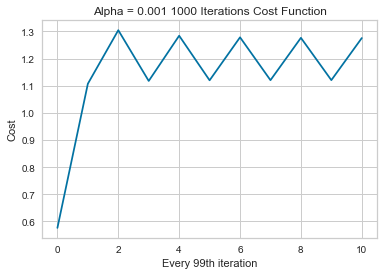

In [37]:
x = J_history[::99]
# y = ydata[::10][::100]
costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 99th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.001 1000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/only_bmi_and_glucose/badcost1000iterations.png")

plt.show()

# Trial 2

## First 1,000 iterations with an alpha value of 0.0001

In [38]:
# Some gradient descent settings
iterations = 1000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     3.39   
Iteration  100: Cost     0.51   
Iteration  200: Cost     0.50   
Iteration  300: Cost     0.50   
Iteration  400: Cost     0.50   
Iteration  500: Cost     0.50   
Iteration  600: Cost     0.50   
Iteration  700: Cost     0.50   
Iteration  800: Cost     0.50   
Iteration  900: Cost     0.50   
Iteration  999: Cost     0.50   


### During the first trial of 1,000 iterations with an alpha of 0.0001 we see the cost start at 3.50 and consistently decreases to 0.50
- plotting out the values of J-History at each 99th value to compare to the above which utilized an alpha of 0.001
- as shown in below cost never increases

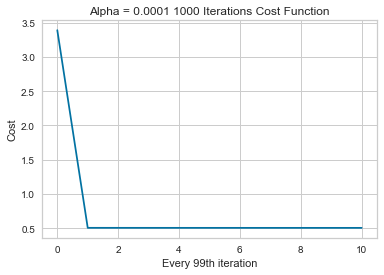

In [39]:
x = J_history[::99]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 99th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 1000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/only_bmi_and_glucose/cost1000iterations.png")

plt.show()

### Only using alpha = 0.0001 fore further tests with higher number of iterations

## Next 10,000 iterations

In [40]:
# Some gradient descent settings
iterations = 10000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     3.39   
Iteration 1000: Cost     0.50   
Iteration 2000: Cost     0.50   
Iteration 3000: Cost     0.50   
Iteration 4000: Cost     0.50   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.50   
Iteration 7000: Cost     0.50   
Iteration 8000: Cost     0.50   
Iteration 9000: Cost     0.50   
Iteration 9999: Cost     0.50   


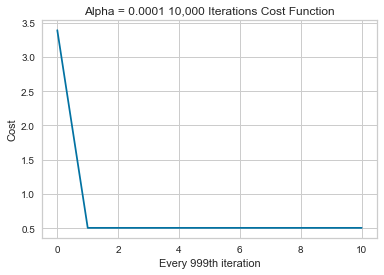

In [41]:
x = J_history[::999]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 999th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 10,000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/only_bmi_and_glucose/cost10000iterations.png")

plt.show()

### During the next trial of 10,000 iterations we see the cost start at 3.50 and decreases to 0.50, no change from 1000 iterations

## Next 100,000 iterations

In [42]:
# Some gradient descent settings
iterations = 100000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     3.39   
Iteration 10000: Cost     0.50   
Iteration 20000: Cost     0.50   
Iteration 30000: Cost     0.50   
Iteration 40000: Cost     0.50   
Iteration 50000: Cost     0.50   
Iteration 60000: Cost     0.50   
Iteration 70000: Cost     0.50   
Iteration 80000: Cost     0.50   
Iteration 90000: Cost     0.50   
Iteration 99999: Cost     0.50   


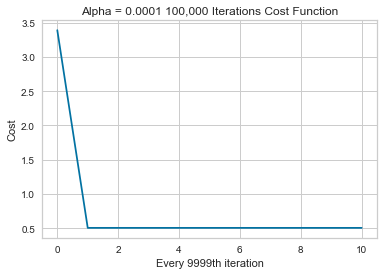

In [43]:
x = J_history[::9999]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 9999th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 100,000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/only_bmi_and_glucose/cost100000iterations.png")

plt.show()

### During the final trial of 100,000 iterations we see the cost start at 3.50 and decreases to 0.50

## Define prediction function

In [44]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_i = np.dot(X[i],w) + b
        # Calculate the prediction for this example
        f_wb = sigmoid(z_i)

        # Apply the threshold
        p[i] = p[i] = f_wb >= 0.5
        
    ### END CODE HERE ### 
    return p

### Compute accuracy on our training set

In [45]:
#Compute accuracy on our training set
p = predict(x_test, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_test) * 100))


Train Accuracy: 78.125000


### The model accuracy achieved with only BMI & Glucose as features is 78.12%

# Plot predicted data

In [46]:
# create data frame of the prediction dataset and export to csv
glucose = [i[0] for i in x_test[::]]
bmi = [i[1] for i in x_test[::]]

data ={ 
    "Glucose": glucose,
    "BMI": bmi,
    "y_test": y_test,
    "Prediction": p}

predictdf = pd.DataFrame(data)
predictdf.to_csv('output_data/2feature-prediction-results.csv')

predictdf

,Glucose,BMI,y_test,Prediction
0,151.0,41.8,1,1.0
1,129.0,27.5,0,0.0
2,88.0,27.6,0,0.0
3,109.0,27.9,1,0.0
4,112.0,38.4,0,0.0
...,...,...,...,...
187,125.0,37.6,0,0.0
188,125.0,22.5,0,0.0
189,142.0,44.0,1,1.0
190,159.0,27.4,0,1.0


In [47]:
predict_diabetics = predictdf[predictdf['Prediction'] == 1][['Glucose','BMI']]
predict_nonDiabetics = predictdf[predictdf['Prediction'] == 0][['Glucose','BMI']]
predict_diabetics[:5]

,Glucose,BMI
0,151.0,41.8
6,183.0,40.8
11,181.0,34.1
13,136.0,35.0
15,148.0,37.6


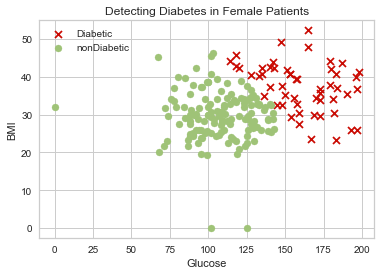

In [48]:
figure1, figure1_axes = plt.subplots()

figure1_axes.scatter(predict_diabetics[['Glucose']], predict_diabetics[['BMI']], 
                     color = 'r', marker='x', label='Diabetic')
figure1_axes.scatter(predict_nonDiabetics[['Glucose']], predict_nonDiabetics[['BMI']], 
                     color = 'g', marker='o', label='nonDiabetic')

figure1_axes.set_xlabel('Glucose')
figure1_axes.set_ylabel('BMI')
figure1_axes.legend(['Diabetic', 'nonDiabetic'])
figure1_axes.set_title('Detecting Diabetes in Female Patients');
figure1.savefig("assets/screenshots/only_bmi_and_glucose/visualizations/predictglucoseVSbmi.png")

# Trial 3
- (Chosen features are Glucose, BMI, & Age)

In [49]:
# create copy of original dataframe for 2nd trial
trial3 = diabetesCSV.copy()
trial3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Choosing features

In [50]:
# create empty list
feature = []
target = []

# for loop to create feature lists to add to above created list

for i in range(len(trial3)):
    diabetesX = []
    diabetesY = ''
    
    # 1 == Glucose, 5 == BMI, 7 == Age
    diabetesY = trial3.iloc[i,8]
    diabetesX.append(trial3.iloc[i,1])
    diabetesX.append(trial3.iloc[i,5])
    diabetesX.append(trial3.iloc[i,7])
    
    feature.append(diabetesX)
    target.append(diabetesY)
    
print(feature[:5])
print(target[:5])

[[148, 33.6, 50], [85, 26.6, 31], [183, 23.3, 32], [89, 28.1, 21], [137, 43.1, 33]]
[1, 0, 1, 0, 1]


In [51]:
# Turn python lists into numpy arrays
features = np.array(feature)
targets = np.array(target)
features[:5]

array([[148. ,  33.6,  50. ],
       [ 85. ,  26.6,  31. ],
       [183. ,  23.3,  32. ],
       [ 89. ,  28.1,  21. ],
       [137. ,  43.1,  33. ]])

### Use Z-Score normalization on features to visualize

In [52]:
# finding standard deviation and mean of each column
featureSTDEV = features.std()
featureAVG = np.average(features)
featureSTDEV

46.2500870684115

In [53]:
# implement Z-Score normalization
featuresNORM = (features - featureAVG)/featureSTDEV

### Create a dataframe with normalized features 

In [54]:
df = pd.DataFrame(data = featuresNORM)
df['Diabetic?'] = targets
df

,0,1,2,Diabetic?
0,1.858533,-0.614975,-0.260381,1
1,0.496374,-0.766326,-0.671191,0
2,2.615289,-0.837678,-0.649570,1
3,0.582860,-0.733894,-0.887407,0
4,1.620696,-0.409570,-0.627948,1
...,...,...,...,...
763,0.842319,-0.630110,0.020699,0
764,1.296372,-0.545786,-0.757678,0
765,1.274751,-0.774975,-0.692813,0
766,1.382859,-0.690651,-0.325246,1


In [55]:
diabetics = df[df['Diabetic?'] == 1][[0,1,2]]
nonDiabetics = df[df['Diabetic?'] == 0][[0,1,2]]
diabetics[:5]

,0,1,2
0,1.858533,-0.614975,-0.260381
2,2.615289,-0.837678,-0.649570
4,1.620696,-0.409570,-0.627948
6,0.345023,-0.671191,-0.779299
8,2.917991,-0.682002,-0.195517


## Create visualization of chosen features

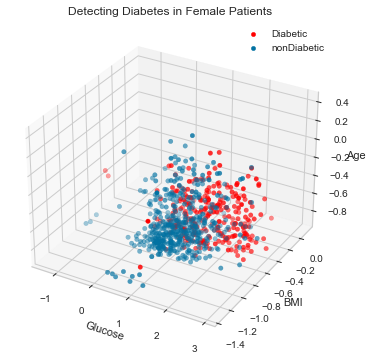

In [56]:
# plot chosen features
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")

ax.scatter3D(diabetics[[0]], diabetics[[1]],diabetics[[2]],color='red')
ax.scatter3D(nonDiabetics[[0]], nonDiabetics[[1]], nonDiabetics[[2]])

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.legend(['Diabetic', 'nonDiabetic'])
ax.set_title('Detecting Diabetes in Female Patients');

fig.savefig("assets/screenshots/bmi_glucose_age/glucoseBmiAge.png", dpi=300)

plt.show()

# Create Logistic Model

In [57]:
# Split the data into X_train, X_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(features, targets)

## Gradient Descent

In [59]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(3).reshape(-1,1) - 0.5)
initial_b = -8
 
# Some gradient descent settings
iterations = 1000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.54   
Iteration  100: Cost     0.50   
Iteration  200: Cost     0.50   
Iteration  300: Cost     0.49   
Iteration  400: Cost     0.49   
Iteration  500: Cost     0.49   
Iteration  600: Cost     0.48   
Iteration  700: Cost     0.48   
Iteration  800: Cost     0.48   
Iteration  900: Cost     0.48   
Iteration  999: Cost     0.48   


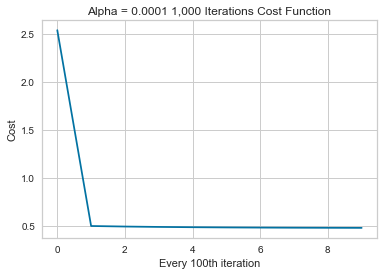

In [60]:
x = J_history[::100]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 100th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 1,000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/bmi_glucose_age/3featuresCost1000Iterations.png")

plt.show()

### During the first trial of 1,000 iterations we see the cost start at 2.54 and decreases to 0.48

## Next 10,000 iterations

In [61]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(3).reshape(-1,1) - 0.5)
initial_b = -8
 
# Some gradient descent settings
iterations = 10000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.54   
Iteration 1000: Cost     0.48   
Iteration 2000: Cost     0.48   
Iteration 3000: Cost     0.48   
Iteration 4000: Cost     0.48   
Iteration 5000: Cost     0.48   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.48   
Iteration 8000: Cost     0.48   
Iteration 9000: Cost     0.48   
Iteration 9999: Cost     0.48   


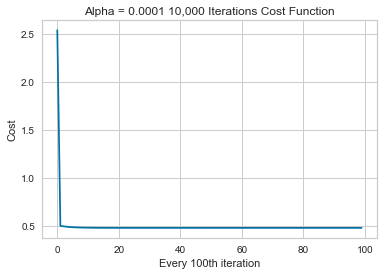

In [62]:
x = J_history[::1000]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 1000th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 10,000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/bmi_glucose_age/3featuresCost10000Iterations.png")

plt.show()

### During the next trial of 10,000 iterations we see the cost start at 2.54 and decreases to 0.48. No change from 1,000 iterations

## Next 100,000 iterations

In [63]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(3).reshape(-1,1) - 0.5)
initial_b = -8
 
# Some gradient descent settings
iterations = 100000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.54   
Iteration 10000: Cost     0.48   
Iteration 20000: Cost     0.48   
Iteration 30000: Cost     0.48   
Iteration 40000: Cost     0.48   
Iteration 50000: Cost     0.48   
Iteration 60000: Cost     0.48   
Iteration 70000: Cost     0.48   
Iteration 80000: Cost     0.48   
Iteration 90000: Cost     0.48   
Iteration 99999: Cost     0.48   


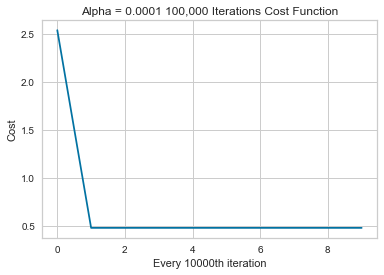

In [65]:
x = J_history[::10000]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 10000th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 100,000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/bmi_glucose_age/3featuresCost100000Iterations.png")

plt.show()

### During the next trial of 100,000 iterations we see the cost start at 2.54 and decreases to 0.48. No change from 1,000 iterations

# Predict

### Compute accuracy on our training set

In [66]:
#Compute accuracy on our training set
p = predict(x_test, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_test) * 100))


Train Accuracy: 75.520833


### The model accuracy achieved with BMI, Glucose, & Age as features is 75.52%

## Plot predicted data

In [68]:
# create data frame of the prediction dataset and export to csv
glucose = [i[0] for i in x_test[::]]
bmi = [i[1] for i in x_test[::]]
age = [i[2] for i in x_test[::]]

data ={ 
    "Glucose": glucose,
    "BMI": bmi,
    "Age": age,
    "y_test": y_test,
    "Prediction": p}

predictdf = pd.DataFrame(data)
predictdf.to_csv('output_data/3feature-prediction-results.csv')

predictdf

,Glucose,BMI,Age,y_test,Prediction
0,158.0,39.4,29.0,1,1.0
1,0.0,24.7,22.0,0,0.0
2,71.0,33.2,21.0,0,0.0
3,130.0,28.4,34.0,1,0.0
4,115.0,30.8,21.0,0,0.0
...,...,...,...,...,...
187,117.0,25.2,21.0,0,0.0
188,132.0,26.8,69.0,0,1.0
189,62.0,32.6,41.0,0,0.0
190,134.0,25.9,81.0,0,1.0


In [69]:
predict_diabetics = predictdf[predictdf['Prediction'] == 1][['Glucose','BMI','Age']]
predict_nonDiabetics = predictdf[predictdf['Prediction'] == 0][['Glucose','BMI','Age']]
predict_diabetics[:5]

,Glucose,BMI,Age
0,158.0,39.4,29.0
5,129.0,38.5,43.0
6,180.0,42.0,25.0
8,147.0,34.9,30.0
9,151.0,35.5,28.0


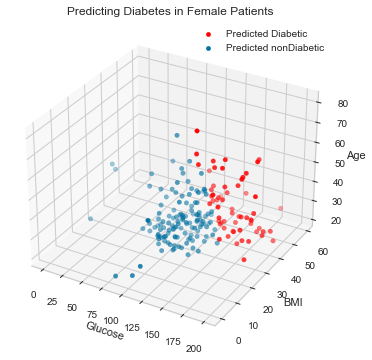

In [70]:
# plot chosen features
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")

ax.scatter3D(predict_diabetics[['Glucose']], predict_diabetics[['BMI']],predict_diabetics[['Age']],color='red')
ax.scatter3D(predict_nonDiabetics[['Glucose']], predict_nonDiabetics[['BMI']], predict_nonDiabetics[['Age']])

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.legend(['Predicted Diabetic', 'Predicted nonDiabetic'])
ax.set_title('Predicting Diabetes in Female Patients');

fig.savefig("assets/screenshots/bmi_glucose_age/predictGlucoseBmiAge.png", dpi=300)

plt.show()

# Trial 4 
- (Chosen features are Glucose, BMI, Age, & Insulin)

In [71]:
# create copy of original dataframe for 2nd trial
trial4 = diabetesCSV.copy()
trial4.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Choosing features

In [72]:
# create empty list
feature = []
target = []

# for loop to create feature lists to add to above created list

for i in range(len(trial3)):
    diabetesX = []
    diabetesY = ''
    
    # 1 == Glucose, 4 == Insulin, 5 == BMI, 7 == Age, 
    diabetesY = trial3.iloc[i,8]
    diabetesX.append(trial3.iloc[i,1])
    diabetesX.append(trial3.iloc[i,4])
    diabetesX.append(trial3.iloc[i,5])
    diabetesX.append(trial3.iloc[i,7])
    
    feature.append(diabetesX)
    target.append(diabetesY)
    
print(feature[:5])
print(target[:5])

[[148, 0, 33.6, 50], [85, 0, 26.6, 31], [183, 0, 23.3, 32], [89, 94, 28.1, 21], [137, 168, 43.1, 33]]
[1, 0, 1, 0, 1]


In [73]:
# Turn python lists into numpy arrays
features = np.array(feature)
targets = np.array(target)
features[:5]

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       [ 89. ,  94. ,  28.1,  21. ],
       [137. , 168. ,  43.1,  33. ]])

# Create Logistic Model

In [77]:
# Split the data into X_train, X_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(features, targets)

## Gradient Descent

In [79]:
# Some gradient descent settings
iterations = 1000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.50   
Iteration  100: Cost     0.53   
Iteration  200: Cost     0.53   
Iteration  300: Cost     0.52   
Iteration  400: Cost     0.51   
Iteration  500: Cost     0.51   
Iteration  600: Cost     0.51   
Iteration  700: Cost     0.51   
Iteration  800: Cost     0.51   
Iteration  900: Cost     0.50   
Iteration  999: Cost     0.50   


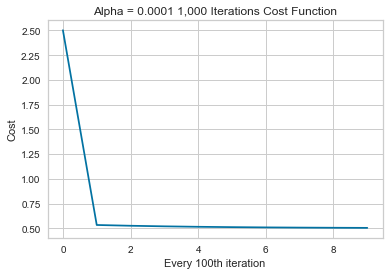

In [80]:
x = J_history[::100]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 100th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 1,000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/bmi_glucose_age_insulin/4featuresCost1000Iterations.png")

plt.show()

### During the first trial of 1,000 iterations we see the cost start at 2.50 and decreases to 0.50

## Next 10,000 iterations

In [81]:
# Some gradient descent settings
iterations = 10000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.50   
Iteration 1000: Cost     0.50   
Iteration 2000: Cost     0.50   
Iteration 3000: Cost     0.50   
Iteration 4000: Cost     0.50   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.50   
Iteration 7000: Cost     0.50   
Iteration 8000: Cost     0.50   
Iteration 9000: Cost     0.50   
Iteration 9999: Cost     0.50   


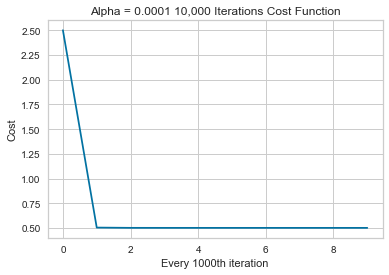

In [83]:
x = J_history[::1000]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 1000th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 10,000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/bmi_glucose_age_insulin/4featuresCost10000Iterations.png")

plt.show()

### During the final trial of 100,000 iterations we see the cost start at 2.50 and decreases to 0.50

## Next 100,000 iterations

In [84]:
# Some gradient descent settings
iterations = 100000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.50   
Iteration 10000: Cost     0.50   
Iteration 20000: Cost     0.50   
Iteration 30000: Cost     0.50   
Iteration 40000: Cost     0.50   
Iteration 50000: Cost     0.50   
Iteration 60000: Cost     0.50   
Iteration 70000: Cost     0.50   
Iteration 80000: Cost     0.50   
Iteration 90000: Cost     0.50   
Iteration 99999: Cost     0.50   


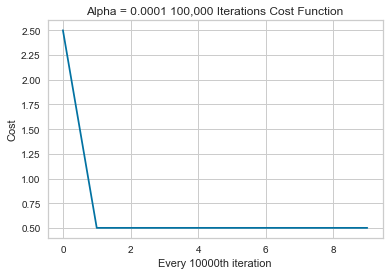

In [85]:
x = J_history[::10000]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 10000th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 100,000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/bmi_glucose_age_insulin/4featuresCost100000Iterations.png")

plt.show()

### During the final trial of 100,000 iterations we see the cost start at 2.50 and decreases to 0.50

# Predict

### Compute accuracy on our training set

In [86]:
#Compute accuracy on our training set
p = predict(x_test, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_test) * 100))


Train Accuracy: 78.125000


### The model accuracy achieved with BMI, Glucose, Age & Insulin as features is 78.13%

In [87]:
# create data frame of the prediction dataset and export to csv
glucose = [i[0] for i in x_test[::]]
insulin = [i[1] for i in x_test[::]]
bmi = [i[2] for i in x_test[::]]
age = [i[3] for i in x_test[::]]

data ={ 
    "Glucose": glucose,
    "Insulin": insulin,
    "BMI": bmi,
    "Age": age,
    "y_test": y_test,
    "Prediction": p}

predictdf = pd.DataFrame(data)
predictdf.to_csv('output_data/4feature-prediction-results.csv')

predictdf

,Glucose,Insulin,BMI,Age,y_test,Prediction
0,155.0,545.0,38.7,34.0,0,1.0
1,151.0,0.0,26.1,22.0,0,0.0
2,124.0,600.0,28.7,52.0,1,0.0
3,90.0,43.0,27.2,24.0,0,0.0
4,168.0,0.0,32.9,41.0,1,1.0
...,...,...,...,...,...,...
187,165.0,680.0,52.3,23.0,0,1.0
188,139.0,160.0,31.6,25.0,1,0.0
189,105.0,325.0,36.9,28.0,0,0.0
190,124.0,130.0,33.2,26.0,0,0.0


# Trial 5
- all available variables

In [88]:
# create copy of original dataframe for 2nd trial
trial5 = diabetesCSV.copy()
trial5.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
feats = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'] 

X = trial5[feats]# Features
y = trial5.Outcome # Target variable 

In [91]:
# Turn python lists into numpy arrays
features = np.array(X)
targets = np.array(y)
targets[:5]

array([1, 0, 1, 0, 1])

### Use Z-Score normalization on features

In [92]:
# finding standard deviation and mean of each column
featureSTDEV = features.std()
featureAVG = np.average(features)
featureSTDEV

58.37297131925462

In [93]:
# implement Z-Score normalization
featuresNORM = (features - featureAVG)/featureSTDEV

# Create Logistic Model

In [94]:
# Split the data into X_train, X_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(features, targets)

## Gradient Descent

In [96]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(8).reshape(-1,1) - 0.5)
initial_b = -8
 
# Some gradient descent settings
iterations = 1000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.60   
Iteration  100: Cost     0.55   
Iteration  200: Cost     0.54   
Iteration  300: Cost     0.53   
Iteration  400: Cost     0.53   
Iteration  500: Cost     0.52   
Iteration  600: Cost     0.52   
Iteration  700: Cost     0.51   
Iteration  800: Cost     0.51   
Iteration  900: Cost     0.51   
Iteration  999: Cost     0.51   


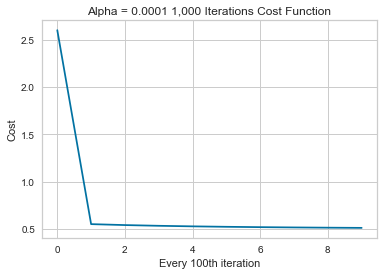

In [98]:
x = J_history[::100]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 100th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 1,000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/all_features/visualizations/allfeatCost1000Iterations.png")

plt.show()

### During the first trial of 1,000 iterations we see the cost start at 2.60 and decreases to 0.50

## Next 10,000 iterations

In [99]:
# Some gradient descent settings
iterations = 10000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.60   
Iteration 1000: Cost     0.51   
Iteration 2000: Cost     0.50   
Iteration 3000: Cost     0.50   
Iteration 4000: Cost     0.50   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.50   
Iteration 7000: Cost     0.50   
Iteration 8000: Cost     0.49   
Iteration 9000: Cost     0.49   
Iteration 9999: Cost     0.49   


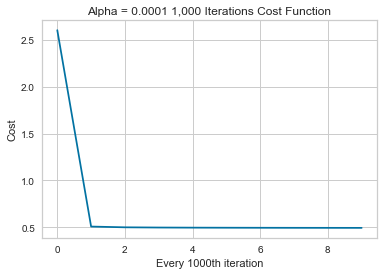

In [100]:
x = J_history[::1000]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 1000th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 1,000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/all_features/visualizations/allfeatCost10000Iterations.png")

plt.show()

### During the next trial of 10,000 iterations we see the cost start at 2.60 and decreases to 0.49.

## Next 100,000 iterations

In [101]:
# Some gradient descent settings
iterations = 100000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.60   
Iteration 10000: Cost     0.49   
Iteration 20000: Cost     0.49   
Iteration 30000: Cost     0.49   
Iteration 40000: Cost     0.49   
Iteration 50000: Cost     0.49   
Iteration 60000: Cost     0.49   
Iteration 70000: Cost     0.49   
Iteration 80000: Cost     0.49   
Iteration 90000: Cost     0.49   
Iteration 99999: Cost     0.49   


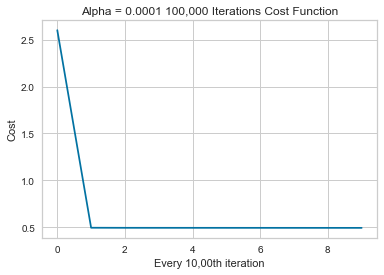

In [102]:
x = J_history[::10000]

costFigure, costFigure_axes = plt.subplots()
costFigure_axes.plot(x)
costFigure_axes.set_xlabel('Every 10,00th iteration')
costFigure_axes.set_ylabel('Cost')
costFigure_axes.set_title('Alpha = 0.0001 100,000 Iterations Cost Function');
costFigure.savefig("assets/screenshots/all_features/visualizations/allfeatCost100000Iterations.png")

plt.show()

# Predict

In [103]:
#Compute accuracy on our training set
p = predict(c, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_test) * 100))


Train Accuracy: 80.208333


### The model accuracy achieved with all variables as features is 80.21%

In [105]:
trial5.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [106]:
# create data frame of the prediction dataset and export to csv
pregnancies = [i[0] for i in x_test[::]]
glucose = [i[1] for i in x_test[::]]
bp = [i[2] for i in x_test[::]]
st = [i[3] for i in x_test[::]]
insulin = [i[4] for i in x_test[::]]
bmi = [i[5] for i in x_test[::]]
dpf = [i[6] for i in x_test[::]]
age = [i[7] for i in x_test[::]]

data ={ 
    "Pregnancies": pregnancies,
    "Glucose": glucose,
    "BloodPressure": bp,
    "SkinThickness": st,
    "Insulin": insulin,
    "BMI": bmi,
    "DiabetesPedigreeFunction": dpf,
    "Age": age,
    "y_test": y_test,
    "Prediction": p}

predictdf = pd.DataFrame(data)
predictdf.to_csv('output_data/allfeature-prediction-results.csv')

predictdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y_test,Prediction
0,1.0,173.0,74.0,0.0,0.0,36.8,0.088,38.0,1,1.0
1,1.0,151.0,60.0,0.0,0.0,26.1,0.179,22.0,0,0.0
2,1.0,140.0,74.0,26.0,180.0,24.1,0.828,23.0,0,0.0
3,9.0,165.0,88.0,0.0,0.0,30.4,0.302,49.0,1,1.0
4,3.0,96.0,78.0,39.0,0.0,37.3,0.238,40.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
187,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23.0,0,1.0
188,5.0,139.0,80.0,35.0,160.0,31.6,0.361,25.0,1,0.0
189,5.0,105.0,72.0,29.0,325.0,36.9,0.159,28.0,0,0.0
190,9.0,130.0,70.0,0.0,0.0,34.2,0.652,45.0,1,1.0
